In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
def build_dataset(bottleneck):
    all_izy = []
    all_izx = []
    all_acc = []
    
    for i in range(350):
        beta = i / 50

        filename = 'iterated-beta{}.csv'.format(beta)

        IZY = []
        IZX = []
        acc = []

        with open('./data-csv-b{}/{}'.format(bottleneck, filename)) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            for row in csvReader:
                IZY.append(row[1])
                IZX.append(row[2])
                acc.append(row[3])

        def convert_to_floats(array):
            out = [float(element) for element in array]
            return out

        acc = float(acc[-1])
        IZY = float(IZY[-1])
        IZX = float(IZX[-1])

        all_izx.append(IZX)
        all_izy.append(IZY)
        all_acc.append(acc)
    return all_izx, all_izy, all_acc

b2_izx, b2_izy, b2_acc = build_dataset(2)
b4_izx, b4_izy, b4_acc = build_dataset(4)
b8_izx, b8_izy, b8_acc = build_dataset(8)
b16_izx, b16_izy, b16_acc = build_dataset(16)
b32_izx, b32_izy, b32_acc = build_dataset(32)
b48_izx, b48_izy, b48_acc = build_dataset(48)
b64_izx, b64_izy, b64_acc = build_dataset(64)


In [4]:
print(len(b2_acc))

350


In [18]:
def plot_acc_vs_beta(all_acc, btl):
    fig, ax = plt.subplots(2, 1, figsize = (10, 12))
    ax[0].scatter(np.linspace(0, 7, 350), all_acc, marker = '.')
    ax[0].set_xlabel('beta (1e-x)')
    ax[0].set_ylabel('acc')
    ax[0].set_title('accuracy vs beta, bottleneck = {}'.format(btl))
    _ = ax[0].set_xticks(np.linspace(0, 7, 8))

    ax[1].scatter(np.linspace(0, 3, 150), all_acc[:150], marker = '.')
    ax[1].set_xlabel('beta (1e-x)')
    ax[1].set_ylabel('acc')
    ax[1].set_title('accuracy vs beta (1e-0 to 1e-3), bottleneck = {}'.format(btl))
    _ = ax[1].set_xticks(np.linspace(0, 3, 4))
    
# plot_acc_vs_beta(b2_acc, 2)
# plot_acc_vs_beta(b4_acc, 4)
# plot_acc_vs_beta(b8_acc, 8)
# plot_acc_vs_beta(b16_acc, 16)
# plot_acc_vs_beta(b32_acc, 32)
# plot_acc_vs_beta(b48_acc, 48)
# plot_acc_vs_beta(b64_acc, 64)

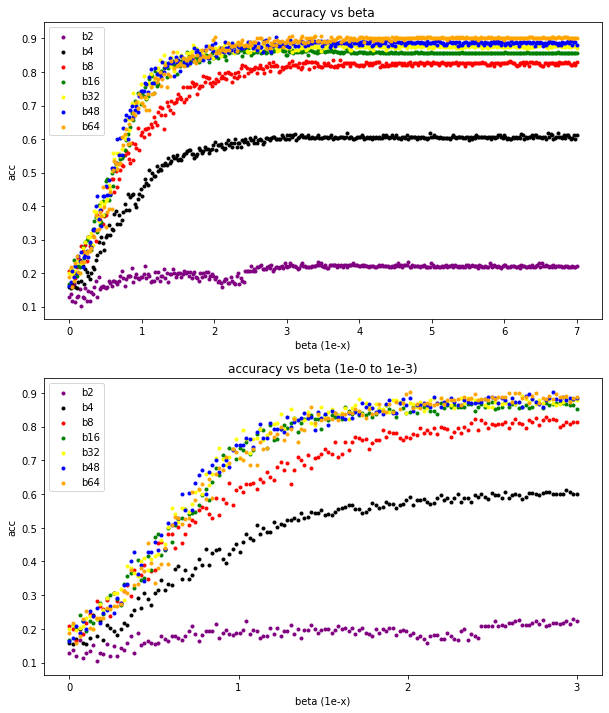

In [39]:
# plot all on one plot
fig, ax = plt.subplots(2, 1, figsize = (10, 12))
ax[0].scatter(np.linspace(0, 7, 350), b2_acc, marker = '.', color = 'purple', label='b2')
ax[0].scatter(np.linspace(0, 7, 350), b4_acc, marker = '.', color = 'black', label='b4')
ax[0].scatter(np.linspace(0, 7, 350), b8_acc, marker = '.', color = 'r', label='b8')
ax[0].scatter(np.linspace(0, 7, 350), b16_acc, marker = '.', color = 'g', label='b16')
ax[0].scatter(np.linspace(0, 7, 350), b32_acc, marker = '.', color = 'yellow', label='b32')
ax[0].scatter(np.linspace(0, 7, 350), b48_acc, marker = '.', color = 'blue', label='b48')
ax[0].scatter(np.linspace(0, 7, 350), b64_acc, marker = '.', color = 'orange', label='b64')
ax[0].set_xlabel('beta (1e-x)')
ax[0].set_ylabel('acc')
ax[0].set_title('accuracy vs beta')
ax[0].legend()
_ = ax[0].set_xticks(np.linspace(0, 7, 8))

ax[1].scatter(np.linspace(0, 3, 150), b2_acc[:150], marker = '.', color = 'purple', label='b2')
ax[1].scatter(np.linspace(0, 3, 150), b4_acc[:150], marker = '.', color = 'black', label='b4')
ax[1].scatter(np.linspace(0, 3, 150), b8_acc[:150], marker = '.', color = 'r', label='b8')
ax[1].scatter(np.linspace(0, 3, 150), b16_acc[:150], marker = '.', color = 'g', label='b16')
ax[1].scatter(np.linspace(0, 3, 150), b32_acc[:150], marker = '.', color = 'yellow', label='b32')
ax[1].scatter(np.linspace(0, 3, 150), b48_acc[:150], marker = '.', color = 'blue', label='b48')
ax[1].scatter(np.linspace(0, 3, 150), b64_acc[:150], marker = '.', color = 'orange', label='b64')
ax[1].set_xlabel('beta (1e-x)')
ax[1].set_ylabel('acc')
ax[1].set_title('accuracy vs beta (1e-0 to 1e-3)')
ax[1].legend()
_ = ax[1].set_xticks(np.linspace(0, 3, 4))

In [19]:
def plot_izy_vs_izx(all_izx, all_izy, btl):
    fig, ax = plt.subplots(2, 1, figsize = (10, 12))
    ax[0].scatter(all_izx[:], all_izy[:], marker='.')
    ax[0].set_xlabel('izx')
    ax[0].set_ylabel('izy')
    ax[0].set_title('I(Z;Y) vs I(Z;X) as a function of beta, bottleneck = {}'.format(btl))

    ax[1].scatter(all_izx[:100], all_izy[:100], marker='.')
    ax[1].set_xlabel('izx')
    ax[1].set_ylabel('izy')
    ax[1].set_title('I(Z;Y) vs I(Z;X) as a function of beta (1e-0 to 1e-2), bottleneck = {}'.format(btl))
    
# plot_izy_vs_izx(b2_izx, b2_izy, 2)
# plot_izy_vs_izx(b4_izx, b4_izy, 4)
# plot_izy_vs_izx(b8_izx, b8_izy, 8)
# plot_izy_vs_izx(b16_izx, b16_izy, 16)
# plot_izy_vs_izx(b32_izx, b32_izy, 32)
# plot_izy_vs_izx(b48_izx, b48_izy, 48)
# plot_izy_vs_izx(b64_izx, b64_izy, 64)

Text(0.5, 1.0, 'I(Z;Y) vs I(Z;X) as a function of beta (1e-0 to 1e-2)')

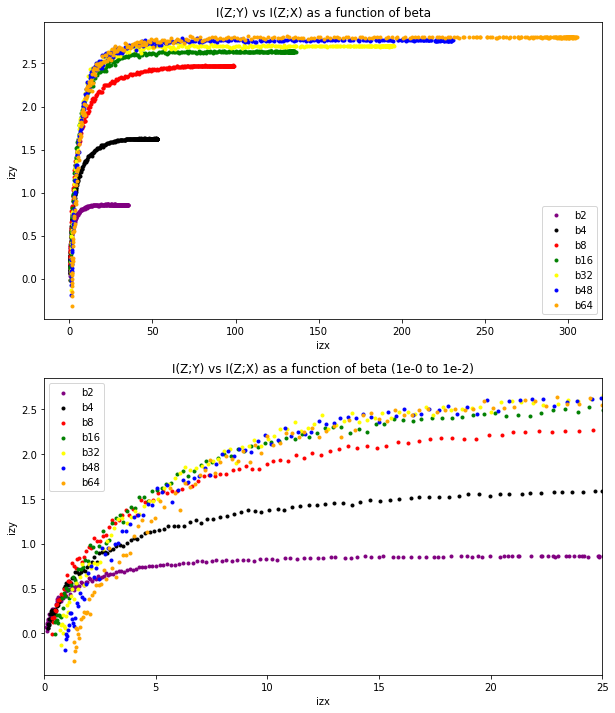

In [40]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12))
ax[0].scatter(b2_izx[:], b2_izy[:], marker='.', color='purple', label='b2')
ax[0].scatter(b4_izx[:], b4_izy[:], marker='.', color='black', label='b4')
ax[0].scatter(b8_izx[:], b8_izy[:], marker='.', color='red', label='b8')
ax[0].scatter(b16_izx[:], b16_izy[:], marker='.', color='green', label='b16')
ax[0].scatter(b32_izx[:], b32_izy[:], marker='.', color='yellow', label='b32')
ax[0].scatter(b48_izx[:], b48_izy[:], marker='.', color='blue', label='b48')
ax[0].scatter(b64_izx[:], b64_izy[:], marker='.', color='orange', label='b64')
ax[0].set_xlabel('izx')
ax[0].set_ylabel('izy')
ax[0].legend()
ax[0].set_title('I(Z;Y) vs I(Z;X) as a function of beta')

ax[1].scatter(b2_izx[:180], b2_izy[:180], marker='.', color='purple', label='b2')
ax[1].scatter(b4_izx[:120], b4_izy[:120], marker='.', color='black', label='b4')
ax[1].scatter(b8_izx[:100], b8_izy[:100], marker='.', color='red', label='b8')
ax[1].scatter(b16_izx[:100], b16_izy[:100], marker='.', color='green', label='b16')
ax[1].scatter(b32_izx[:100], b32_izy[:100], marker='.', color='yellow', label='b32')
ax[1].scatter(b48_izx[:100], b48_izy[:100], marker='.', color='blue', label='b48')
ax[1].scatter(b64_izx[:100], b64_izy[:100], marker='.', color='orange', label='b64')
ax[1].set_xlim((0, 25))
ax[1].set_xlabel('izx')
ax[1].set_ylabel('izy')
ax[1].legend()
ax[1].set_title('I(Z;Y) vs I(Z;X) as a function of beta (1e-0 to 1e-2)')

In [34]:
def plot_izx_vs_beta(all_izx, btl):
    fig, ax = plt.subplots(2, 1, figsize = (10, 12))
    ax[0].scatter(np.linspace(0, 7, 350), all_izx[:], marker = '.')
    ax[0].set_xlabel('beta (1e-x)')
    ax[0].set_ylabel('I(Z;X)')
    ax[0].set_title('I(Z;X) vs beta, bottleneck = {}'.format(btl))
    _ = ax[0].set_xticks(np.linspace(0, 7, 8))

    ax[1].scatter(np.linspace(0, 2, 100), all_izx[:100], marker = '.')
    ax[1].set_xlabel('beta (1e-x)')
    ax[1].set_ylabel('I(Z;X)')
    ax[1].set_title('I(Z;X) vs beta (1e-0 to 1e-2), bottleneck = {}'.format(btl))
    _ = ax[1].set_xticks(np.linspace(0, 2, 3))

# plot_izx_vs_beta(b2_izx, 2)
# plot_izx_vs_beta(b4_izx, 4)
# plot_izx_vs_beta(b8_izx, 8)
# plot_izx_vs_beta(b16_izx, 16)
# plot_izx_vs_beta(b32_izx, 32)
# plot_izx_vs_beta(b48_izx, 48)
# plot_izx_vs_beta(b64_izx, 64)

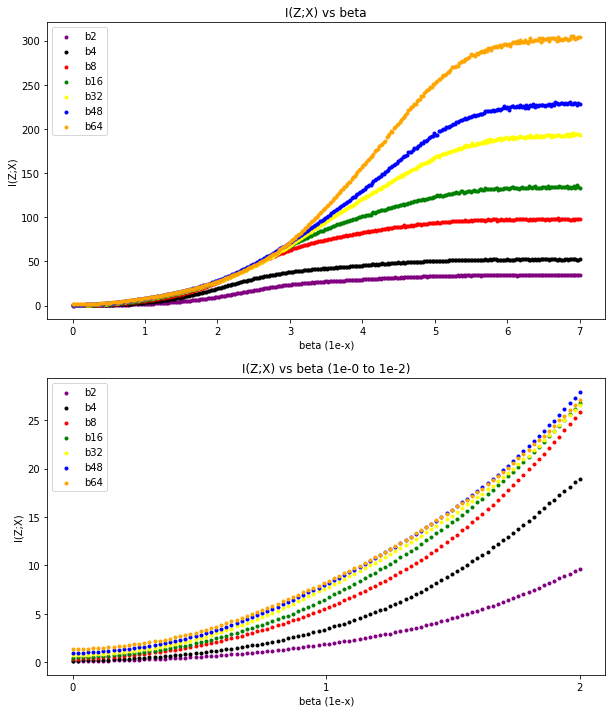

In [41]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12))
ax[0].scatter(np.linspace(0, 7, 350), b2_izx[:], marker = '.', color='purple', label='b2')
ax[0].scatter(np.linspace(0, 7, 350), b4_izx[:], marker = '.', color='black', label='b4')
ax[0].scatter(np.linspace(0, 7, 350), b8_izx[:], marker = '.', color='red', label='b8')
ax[0].scatter(np.linspace(0, 7, 350), b16_izx[:], marker = '.', color='green', label='b16')
ax[0].scatter(np.linspace(0, 7, 350), b32_izx[:], marker = '.', color='yellow', label='b32')
ax[0].scatter(np.linspace(0, 7, 350), b48_izx[:], marker = '.', color='blue', label='b48')
ax[0].scatter(np.linspace(0, 7, 350), b64_izx[:], marker = '.', color='orange', label='b64')
ax[0].set_xlabel('beta (1e-x)')
ax[0].set_ylabel('I(Z;X)')
ax[0].set_title('I(Z;X) vs beta')
ax[0].legend()
_ = ax[0].set_xticks(np.linspace(0, 7, 8))

ax[1].scatter(np.linspace(0, 2, 100), b2_izx[:100], marker = '.', color='purple', label='b2')
ax[1].scatter(np.linspace(0, 2, 100), b4_izx[:100], marker = '.', color='black', label='b4')
ax[1].scatter(np.linspace(0, 2, 100), b8_izx[:100], marker = '.', color='red', label='b8')
ax[1].scatter(np.linspace(0, 2, 100), b16_izx[:100], marker = '.', color='green', label='b16')
ax[1].scatter(np.linspace(0, 2, 100), b32_izx[:100], marker = '.', color='yellow', label='b32')
ax[1].scatter(np.linspace(0, 2, 100), b48_izx[:100], marker = '.', color='blue', label='b48')
ax[1].scatter(np.linspace(0, 2, 100), b64_izx[:100], marker = '.', color='orange', label='b64')
ax[1].set_xlabel('beta (1e-x)')
ax[1].set_ylabel('I(Z;X)')
ax[1].set_title('I(Z;X) vs beta (1e-0 to 1e-2)')
ax[1].legend()
_ = ax[1].set_xticks(np.linspace(0, 2, 3))

In [37]:
def plot_izy_vs_beta(all_izy, btl):
    fig, ax = plt.subplots(2, 1, figsize = (10, 12))
    ax[0].scatter(np.linspace(0, 7, 350), all_izy[:], marker = '.')
    ax[0].set_xlabel('beta (1e-x)')
    ax[0].set_ylabel('I(Z;Y)')
    ax[0].set_title('I(Z;Y) vs beta, bottleneck = {}'.format(btl))
    _ = plt.xticks(np.linspace(0, 7, 8))

    ax[1].scatter(np.linspace(0, 2, 100), all_izy[:100], marker = '.')
    ax[1].set_xlabel('beta (1e-x)')
    ax[1].set_ylabel('I(Z;Y)')
    ax[1].set_title('I(Z;Y) vs beta (1e-0 to 1e-2), bottleneck = {}'.format(btl))
    _ = plt.xticks(np.linspace(0, 2, 3))

# plot_izy_vs_beta(b2_izy, 2)
# plot_izy_vs_beta(b4_izy, 4)
# plot_izy_vs_beta(b8_izy, 8)
# plot_izy_vs_beta(b16_izy, 16)
# plot_izy_vs_beta(b32_izy, 32)
# plot_izy_vs_beta(b48_izy, 48)
# plot_izy_vs_beta(b64_izy, 64)

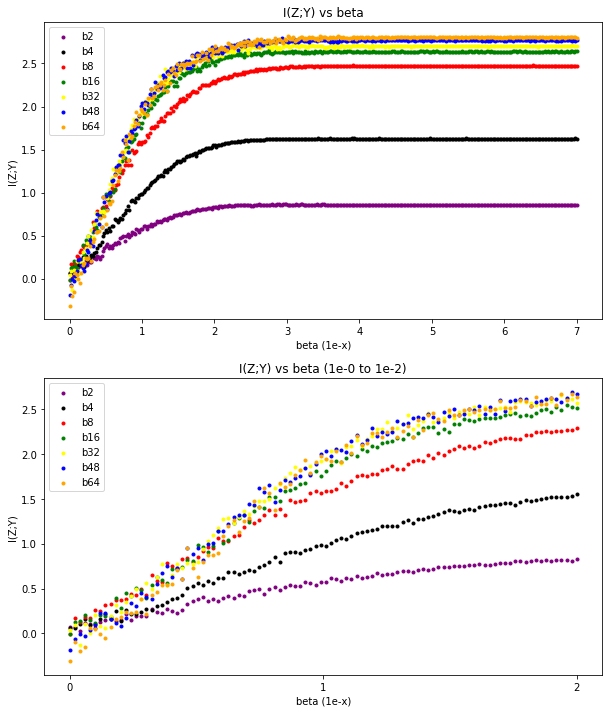

In [43]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12))
ax[0].scatter(np.linspace(0, 7, 350), b2_izy[:], marker = '.', color='purple', label='b2')
ax[0].scatter(np.linspace(0, 7, 350), b4_izy[:], marker = '.', color='black', label='b4')
ax[0].scatter(np.linspace(0, 7, 350), b8_izy[:], marker = '.', color='red', label='b8')
ax[0].scatter(np.linspace(0, 7, 350), b16_izy[:], marker = '.', color='green', label='b16')
ax[0].scatter(np.linspace(0, 7, 350), b32_izy[:], marker = '.', color='yellow', label='b32')
ax[0].scatter(np.linspace(0, 7, 350), b48_izy[:], marker = '.', color='blue', label='b48')
ax[0].scatter(np.linspace(0, 7, 350), b64_izy[:], marker = '.', color='orange', label='b64')
ax[0].set_xlabel('beta (1e-x)')
ax[0].set_ylabel('I(Z;Y)')
ax[0].set_title('I(Z;Y) vs beta')
ax[0].legend()
_ = plt.xticks(np.linspace(0, 7, 8))

ax[1].scatter(np.linspace(0, 2, 100), b2_izy[:100], marker = '.', color='purple', label='b2')
ax[1].scatter(np.linspace(0, 2, 100), b4_izy[:100], marker = '.', color='black', label='b4')
ax[1].scatter(np.linspace(0, 2, 100), b8_izy[:100], marker = '.', color='red', label='b8')
ax[1].scatter(np.linspace(0, 2, 100), b16_izy[:100], marker = '.', color='green', label='b16')
ax[1].scatter(np.linspace(0, 2, 100), b32_izy[:100], marker = '.', color='yellow', label='b32')
ax[1].scatter(np.linspace(0, 2, 100), b48_izy[:100], marker = '.', color='blue', label='b48')
ax[1].scatter(np.linspace(0, 2, 100), b64_izy[:100], marker = '.', color='orange', label='b64')
ax[1].set_xlabel('beta (1e-x)')
ax[1].set_ylabel('I(Z;Y)')
ax[1].set_title('I(Z;Y) vs beta (1e-0 to 1e-2)')
ax[1].legend()
_ = plt.xticks(np.linspace(0, 2, 3))